Title: Supervised Learning 

Task 1: Identify input-output pairs in a dataset of housing prices.

In [7]:
# Write your code here

import pandas as pd
import numpy as np

# --- 1. Load your Dataset (or generate synthetic data) ---
# For demonstration, we'll generate the same synthetic data as before.
# If you have a real CSV, replace this with:
# df = pd.read_csv('your_housing_data.csv')
np.random.seed(42) # for reproducibility

SIZE_COLUMN_NAME = 'Size_sqft'
PRICE_COLUMN_NAME = 'Price'

house_size = np.random.uniform(800, 3000, 100) # Flattened for DataFrame creation
price_per_sqft = 150
base_price = 50000
noise = np.random.normal(0, 30000, 100)

house_price = (house_size * price_per_sqft) + base_price + noise

df = pd.DataFrame({
    SIZE_COLUMN_NAME: house_size,
    PRICE_COLUMN_NAME: house_price,
    'Bedrooms': np.random.randint(2, 6, 100), # Adding another feature
    'Neighborhood_Score': np.random.uniform(1, 10, 100) # Another feature
})

print("Full Dataset Sample (first 5 rows):")
print(df.head())
print(f"\nFull Dataset Shape: {df.shape} (rows, columns)")

# --- 2. Identify and Separate Inputs (Features) and Output (Target) ---

# Define the input features (independent variables)
# X should typically be a DataFrame (even for a single feature)
# If predicting solely on size:
X = df[[SIZE_COLUMN_NAME]]

# If predicting on multiple features (e.g., size, bedrooms, neighborhood score):
# X = df[[SIZE_COLUMN_NAME, 'Bedrooms', 'Neighborhood_Score']]

# Define the output target (dependent variable)
# y is typically a Series (single column)
y = df[PRICE_COLUMN_NAME]

print("\n--- Identified Input-Output Pairs ---")
print(f"\nInputs (X) - Features Sample (first 5 rows):")
print(X.head())
print(f"Inputs (X) Shape: {X.shape}") # (number_of_samples, number_of_features)

print(f"\nOutput (y) - Target Sample (first 5 values):")
print(y.head())
print(f"Output (y) Shape: {y.shape}") # (number_of_samples,)

Full Dataset Sample (first 5 rows):
     Size_sqft          Price  Bedrooms  Neighborhood_Score
0  1623.988261  296209.651267         3            9.010048
1  2891.571474  474765.500601         2            4.041956
2  2410.386672  414310.824094         3            4.380247
3  2117.048665  307930.232347         2            1.845837
4  1143.241009  214895.994711         5            6.204521

Full Dataset Shape: (100, 4) (rows, columns)

--- Identified Input-Output Pairs ---

Inputs (X) - Features Sample (first 5 rows):
     Size_sqft
0  1623.988261
1  2891.571474
2  2410.386672
3  2117.048665
4  1143.241009
Inputs (X) Shape: (100, 1)

Output (y) - Target Sample (first 5 values):
0    296209.651267
1    474765.500601
2    414310.824094
3    307930.232347
4    214895.994711
Name: Price, dtype: float64
Output (y) Shape: (100,)


Task 2: Match labeled images to their correct classifications.

Dataset shape: (1797, 64) (number of images, number of features/pixels)
Image shape: 8x8 pixels
Number of target classes (digits): 10
Example target names: [0 1 2 3 4 5 6 7 8 9]


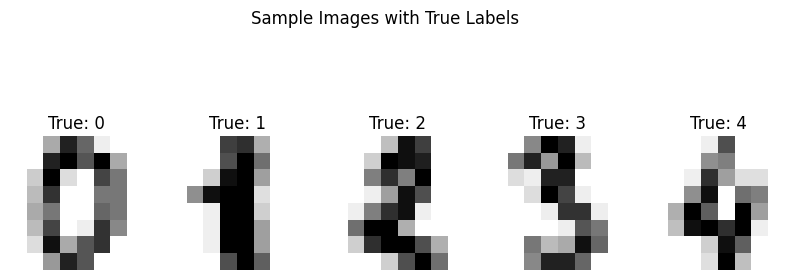


Training data shape: X_train=(1437, 64), y_train=(1437,)
Testing data shape: X_test=(360, 64), y_test=(360,)

Training the K-Nearest Neighbors Classifier...
Model training complete.

--- Model Evaluation ---
Accuracy Score: 0.9861

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0

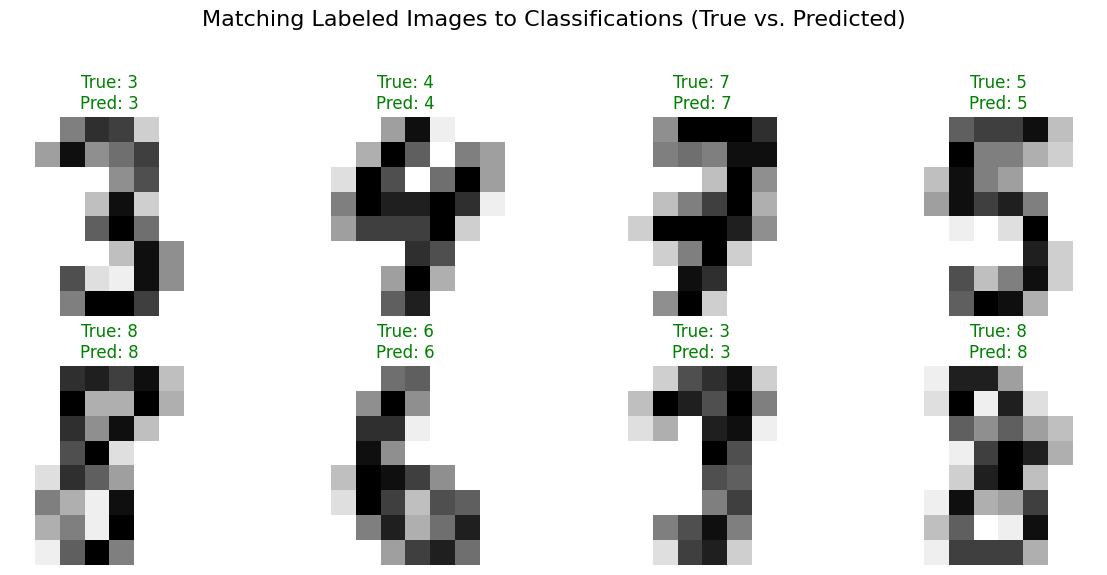


--- Matching Complete ---
The plot above shows selected test images with their true labels and the labels predicted by the model.
Green title indicates a correct match, red indicates a mismatch.


In [8]:
# Write your code here

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # A simple yet effective classifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# --- 1. Load the Dataset (Scikit-learn's Digits Dataset) ---
# This dataset contains 8x8 pixel images of handwritten digits (0-9).
digits = datasets.load_digits()

# --- 2. Data Preprocessing & Understanding the Data ---
# Images are stored as arrays.
# digits.images contains the 2D (8x8) image data.
# digits.data contains the flattened (64-pixel long) feature vectors.
# digits.target contains the labels (0-9).

print(f"Dataset shape: {digits.data.shape} (number of images, number of features/pixels)")
print(f"Image shape: {digits.images.shape[1]}x{digits.images.shape[2]} pixels")
print(f"Number of target classes (digits): {len(digits.target_names)}")
print(f"Example target names: {digits.target_names}")

# Display a few sample images and their actual labels
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'True: {label}')
    plt.axis('off')
plt.suptitle('Sample Images with True Labels')
plt.show()

# --- 3. Split Data into Training and Testing Sets ---
X = digits.data # Features (flattened pixel values)
y = digits.target # Target (the actual digit)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# --- 4. Choose and Train a Model (K-Nearest Neighbors Classifier) ---
# KNeighborsClassifier is a simple, non-parametric classification algorithm.
# n_neighbors specifies the number of neighbors to consider.
classifier = KNeighborsClassifier(n_neighbors=5)

print("\nTraining the K-Nearest Neighbors Classifier...")
classifier.fit(X_train, y_train)
print("Model training complete.")

# --- 5. Make Predictions on the Test Set ---
y_pred = classifier.predict(X_test)

# --- 6. Evaluate the Model ---
print("\n--- Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in digits.target_names]))

# --- 7. Visualize Matching: Display Images with True vs. Predicted Labels ---
# Select a few random samples from the test set to visualize
num_samples_to_show = 8
sample_indices = np.random.choice(len(X_test), num_samples_to_show, replace=False)

plt.figure(figsize=(12, 6))
for i, index in enumerate(sample_indices):
    image_data = X_test[index].reshape(8, 8) # Reshape flattened data back to 8x8 for display
    true_label = y_test[index]
    predicted_label = y_pred[index]

    plt.subplot(2, 4, i + 1) # 2 rows, 4 columns
    plt.imshow(image_data, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'True: {true_label}\nPred: {predicted_label}',
              color='green' if true_label == predicted_label else 'red')
    plt.axis('off')

plt.suptitle('Matching Labeled Images to Classifications (True vs. Predicted)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print("\n--- Matching Complete ---")
print("The plot above shows selected test images with their true labels and the labels predicted by the model.")
print("Green title indicates a correct match, red indicates a mismatch.")

Task 3: List potential inputs and outputs for predicting stock prices.

In [9]:
# Write your code from here

import pandas as pd
import numpy as np # For potential target transformation

# --- Assume 'df' is your historical stock data DataFrame ---
# It would typically have columns like 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
# and potentially other features you've engineered or collected.

# Example synthetic DataFrame for demonstration:
# In a real scenario, you'd load from CSV: df = pd.read_csv('your_stock_data.csv')
data = {
    'Date': pd.to_datetime(pd.date_range(start='2023-01-01', periods=100, freq='B')),
    'Open': np.random.uniform(100, 110, 100),
    'High': np.random.uniform(105, 115, 100),
    'Low': np.random.uniform(95, 105, 100),
    'Close': np.random.uniform(98, 112, 100),
    'Volume': np.random.randint(1_000_000, 5_000_000, 100),
}
df = pd.DataFrame(data).set_index('Date')

# --- Feature Engineering Example (creating a couple of common technical indicators) ---
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['RSI_14'] = np.random.uniform(30, 70, 100) # Placeholder, actual calculation is more complex
df['Prev_Close'] = df['Close'].shift(1) # Previous day's close

# Drop rows with NaN values created by rolling windows or shifting
df.dropna(inplace=True)

print("Sample DataFrame with potential features:")
print(df.head())
print(f"\nDataFrame shape: {df.shape}")

# --- 1. Define the Output (Target Variable - y) ---
# Option A: Predict the next day's closing price
# y = df['Close'].shift(-1)

# Option B: Predict the next day's percentage change in close price
y = (df['Close'].pct_change() * 100).shift(-1)

# Option C: Predict the direction (Up/Down/No Change for classification)
# For a binary classification (Up or Down, excluding no change)
# y = (df['Close'].diff().shift(-1) > 0).astype(int) # 1 if up, 0 if down/flat

# Drop the last row of y, as its corresponding X would be NaN (no next day to predict)
y = y.dropna()

print(f"\nSelected Output (y) - Type: {y.name} (first 5 values):")
print(y.head())
print(f"Output (y) shape: {y.shape}")

# --- 2. Define the Inputs (Features - X) ---
# Select the columns you want to use as input features.
# Make sure to exclude the target variable itself and any future information!
features_to_use = [
    'Open', 'High', 'Low', 'Close', 'Volume', # Raw prices
    'SMA_10', 'RSI_14', # Technical Indicators
    'Prev_Close' # Lagged value
    # Add other features if you had them, e.g., 'Earnings_Per_Share', 'Inflation_Rate'
]

X = df[features_to_use]

# Align X and y. If y was shifted, X needs to correspond to the period *before* the target.
# If y was `shift(-1)`, then the last row of X needs to be dropped as there's no corresponding y.
# If y was `dropna()`, then X must be aligned by index.
X = X.loc[y.index] # Align X to the index of y after y.dropna()

print(f"\nSelected Inputs (X) - Features Sample (first 5 rows):")
print(X.head())
print(f"Inputs (X) shape: {X.shape}")

# Verify that X and y have the same number of samples
if X.shape[0] != y.shape[0]:
    print("\nWarning: X and y do not have the same number of samples. This indicates a data alignment issue.")
    print(f"X samples: {X.shape[0]}, y samples: {y.shape[0]}")
else:
    print("\nSuccessfully identified and aligned X and y for prediction.")


Sample DataFrame with potential features:
                  Open        High         Low       Close   Volume  \
Date                                                                  
2023-01-13  105.577423  112.305491  102.997820  106.026121  4271069   
2023-01-16  105.865354  111.937176   98.493870  109.733497  2020154   
2023-01-17  105.644585  106.667308   99.682318  103.661341  3913014   
2023-01-18  103.787726  113.786291  101.249760  108.792759  4876620   
2023-01-19  103.374468  109.954236   98.777259  103.908505  3649228   

                SMA_10     RSI_14  Prev_Close  
Date                                           
2023-01-13  103.852789  45.849681  104.919834  
2023-01-16  104.017855  60.329539  106.026121  
2023-01-17  104.434779  57.840825  109.733497  
2023-01-18  105.318029  36.155836  103.661341  
2023-01-19  105.539722  62.633325  108.792759  

DataFrame shape: (91, 8)

Selected Output (y) - Type: Close (first 5 values):
Date
2023-01-13    3.496663
2023-01-16   -5.5